In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError as rmse

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('Digital_image').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df.head(14)

X = df[['input']].values
y = df[['output']].values
Scaler = MinMaxScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=33)
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)
model = Sequential([
Dense(17,activation = 'relu',input_shape=[1]),
Dense(10,activation = 'relu'),
Dense(1)
])
model.compile(optimizer='rmsprop',loss = 'mse')
model.fit(X_train1,y_train,epochs=2000)
model.fit(X_train,y_train,epochs=2000)
loss_plot = pd.DataFrame(model.history.history)
loss_plot.plot()
err = rmse()
preds = model.predict(X_test)
err(y_test,preds)
x_n1 = [[40]]
x_n_n = Scaler.transform(x_n1)
model.predict(x_n_n)


In [28]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError as rmse

In [29]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

sheet = gc.open('deeplearning').sheet1 
rows = sheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'int'})
df = df.astype({'Output':'int'})

In [30]:
df.head(14)

,Input,Output
0,1,5
1,2,9
2,3,13
3,4,17
4,5,21
5,6,25
6,7,29
7,8,33
8,9,37
9,10,41


In [31]:
X = df[['Input']].values
y = df[['Output']].values

In [32]:
Scaler = MinMaxScaler()

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=33)
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)
model = Sequential([
Dense(17,activation = 'relu',input_shape=[1]),
Dense(10,activation = 'relu'),
Dense(1)
])

In [34]:
model.compile(optimizer='rmsprop',loss = 'mse')
model.fit(X_train1,y_train,epochs=2000)
model.fit(X_train,y_train,epochs=2000)
loss_plot = pd.DataFrame(model.history.history)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 0.0069
Epoch 1276/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 1277/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 1278/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 1279/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 1280/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 1281/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 1282/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 1283/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 1284/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 1285/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0069
Epoch 1286/2000
1/1 [==============================] - 0s 11m

<Axes: >

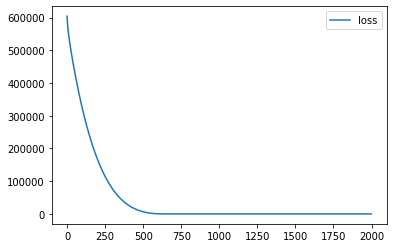

In [35]:
loss_plot.plot()

In [38]:
err = rmse()
preds = model.predict(X_test)
err(y_test,preds)


1/1 [==============================] - 0s 26ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.37471908>

In [39]:
x_n1 = [[40]]
x_n_n = Scaler.transform(x_n1)
model.predict(x_n_n)

1/1 [==============================] - 0s 25ms/step


array([[9.380068]], dtype=float32)